## Download the survey data from Qualtrics.

Open Qualtrics<br>
Select Data & Analysis<br>
Select Export & Import<br>
Export<br>

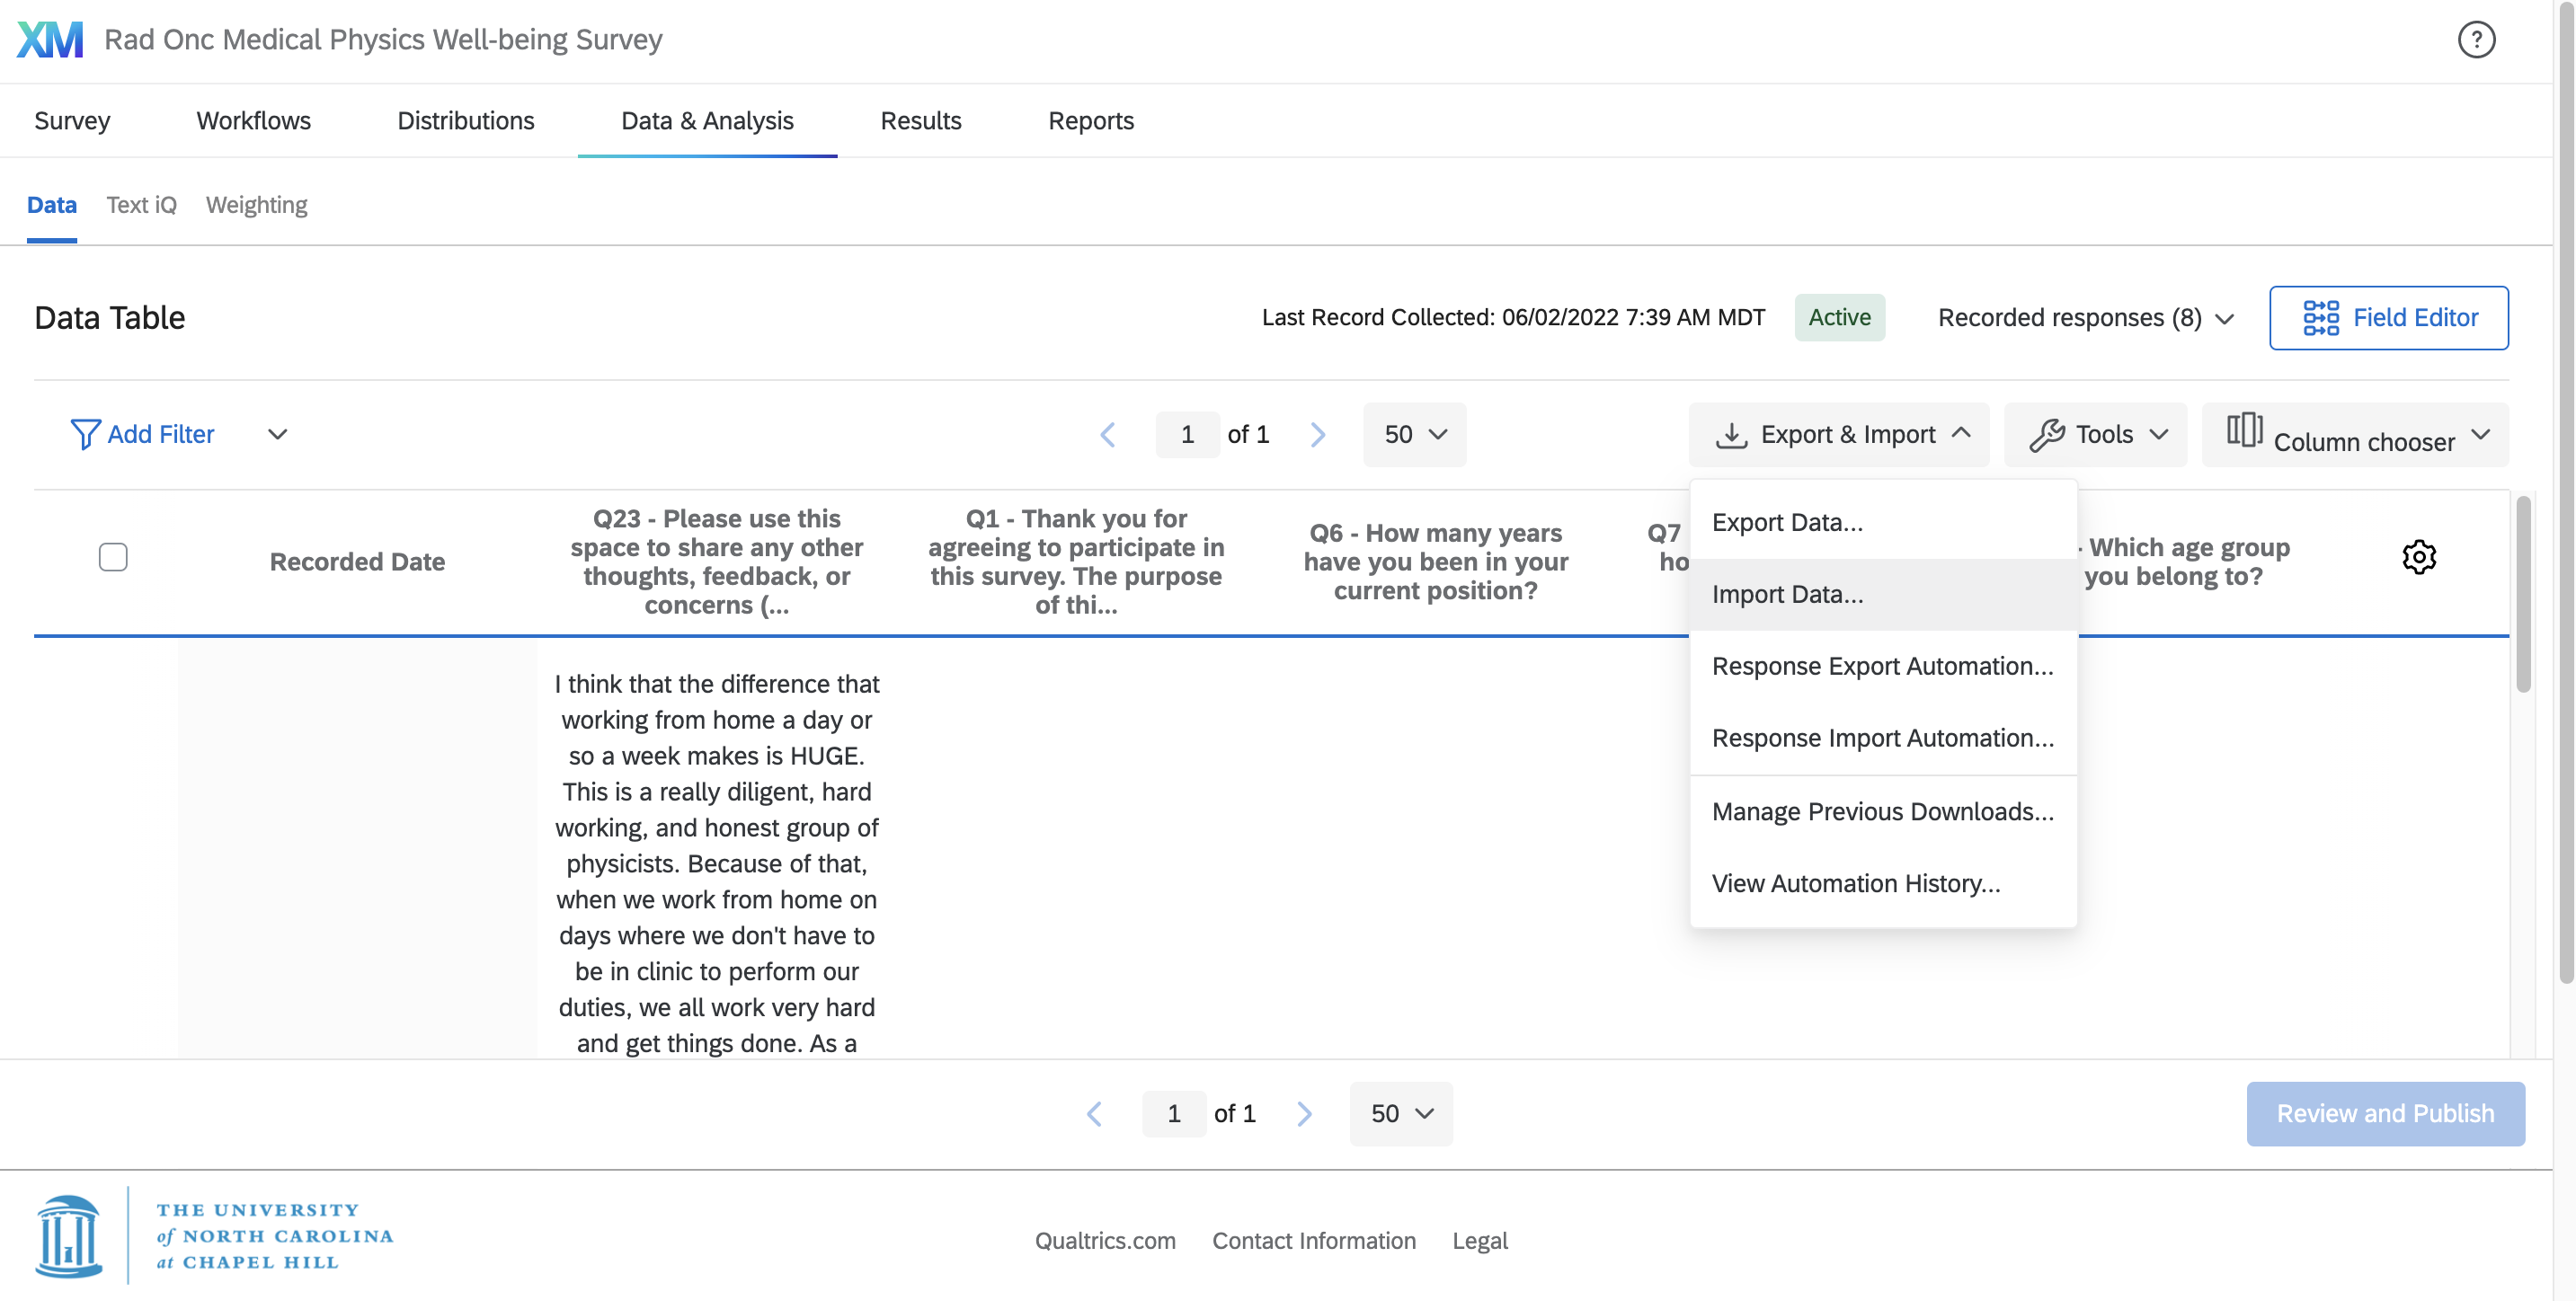

### Export data

File as "Excel"<br>
Numeric responses or choice text: "Use choice text"<br>

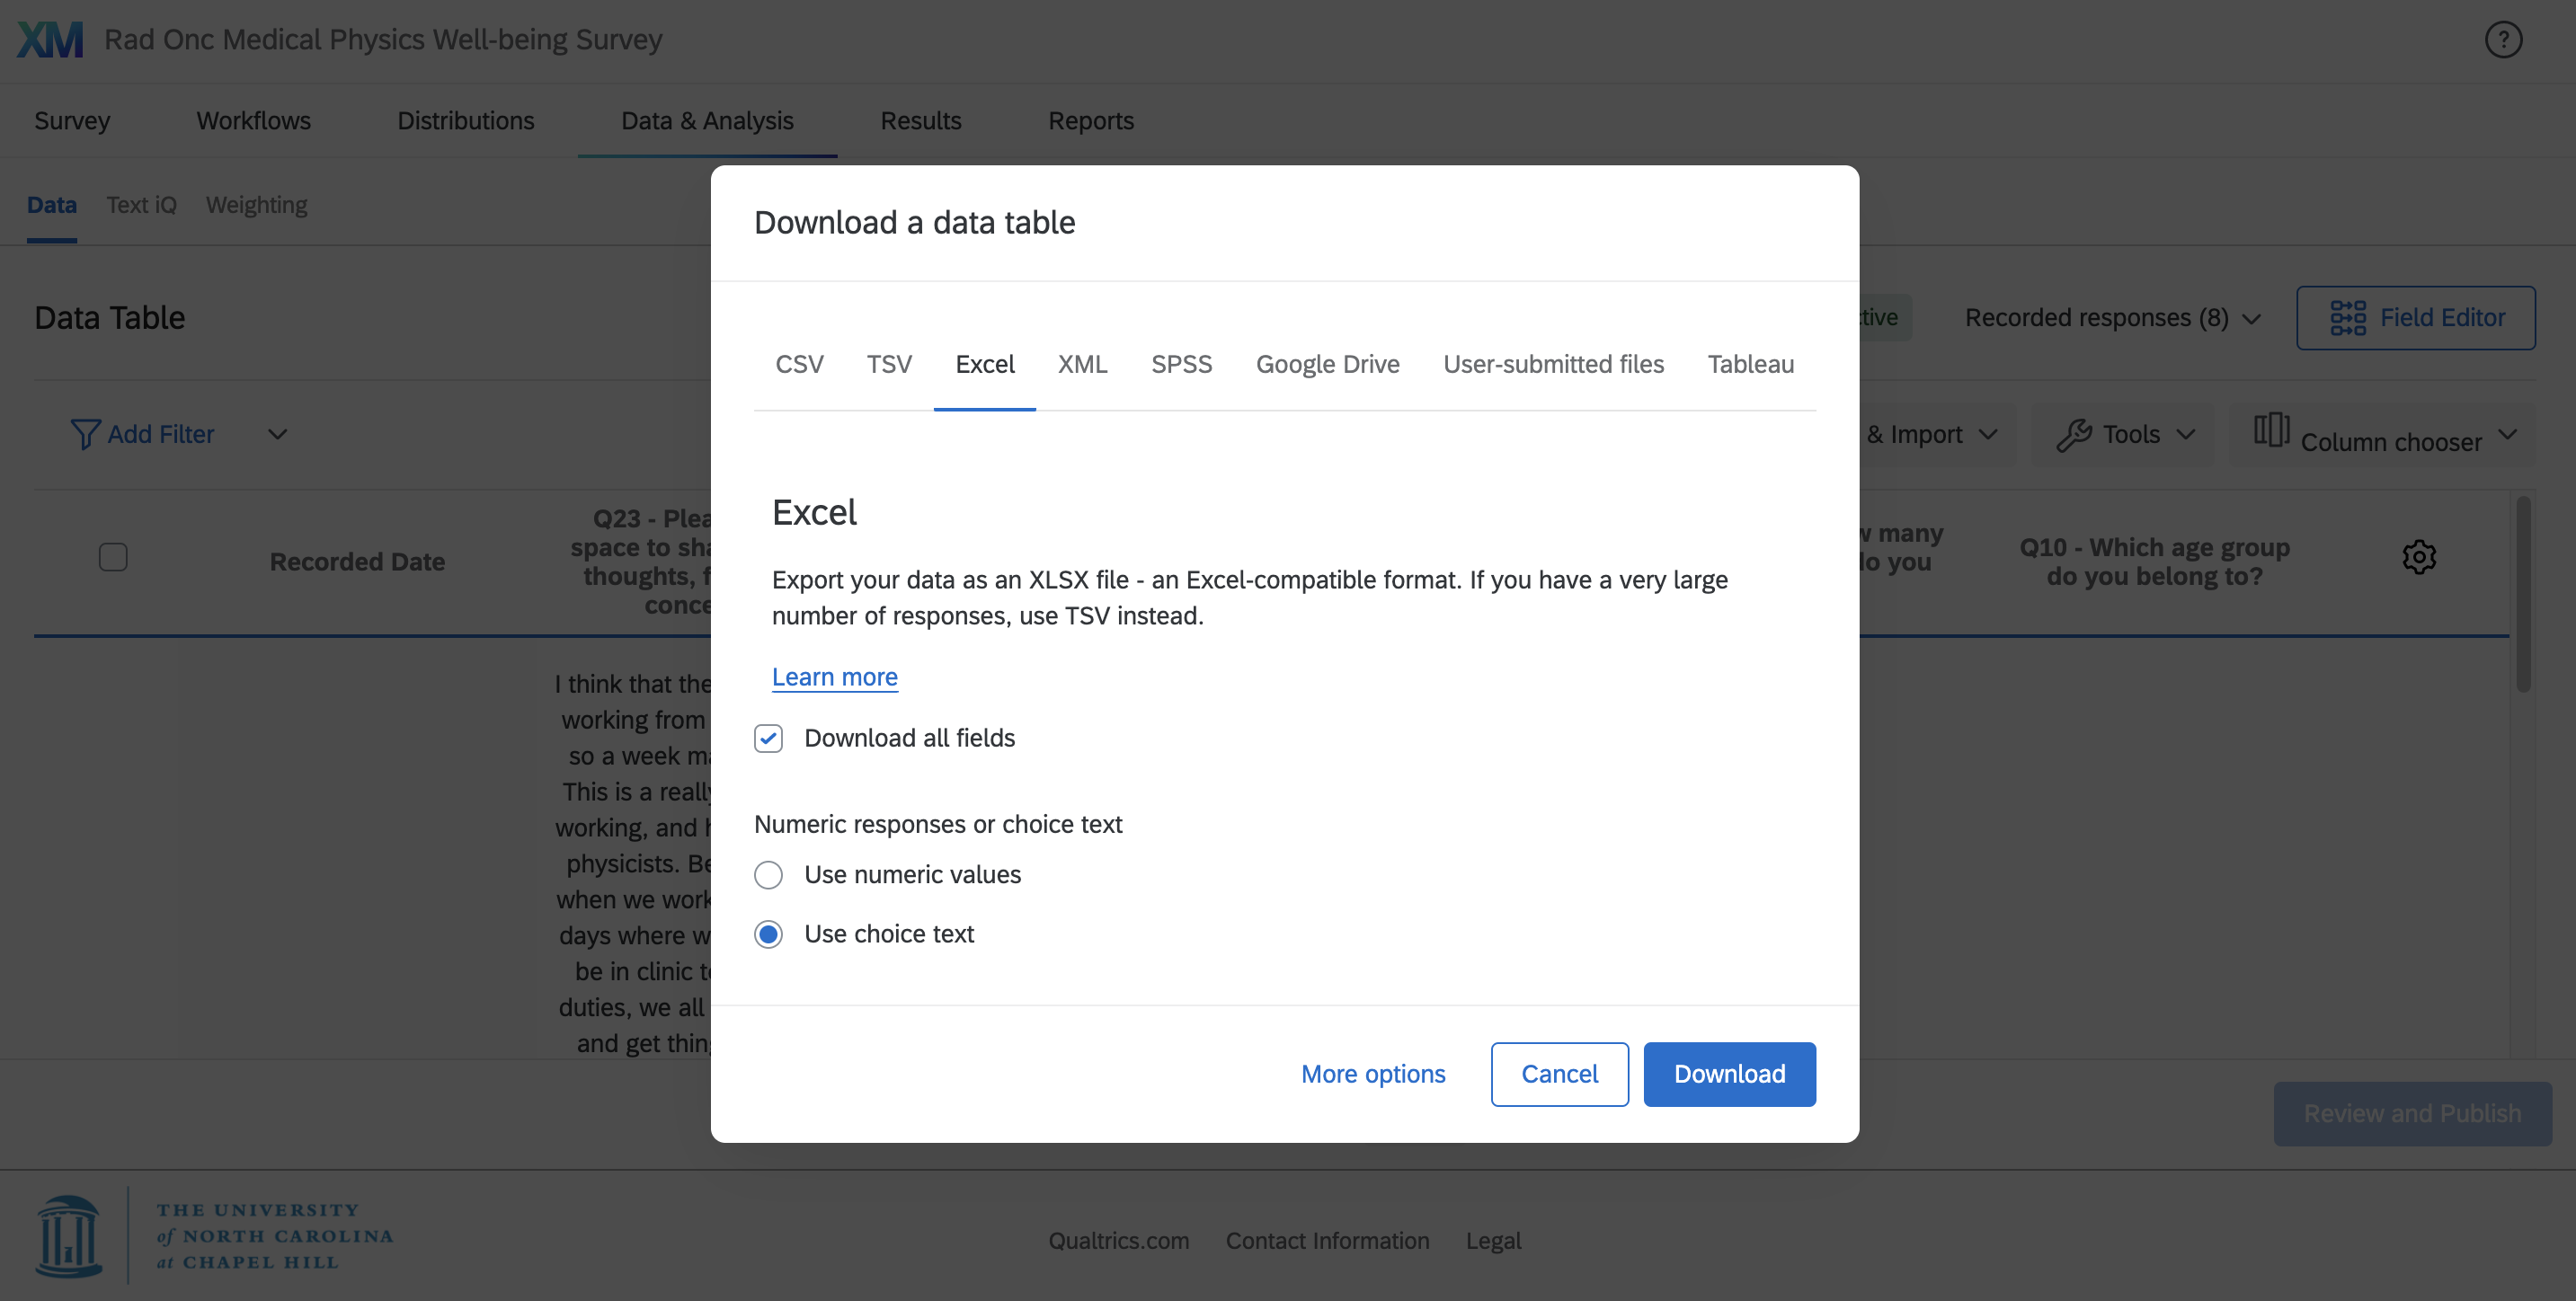

### Excel Modified

Open the downloaded file and rename "<font color="#ab3428">Sheet0</font>" into "<font color="#336699">raw_data</font>" <br>
Add a new sheet call "<font color="#336699">data_modified</font>" <br>
Copy all data from "raw_data" sheet and pasted into "data_modified" sheet and delect the second column<br>
Delect the second row of "data_modified" <br>

### "Question" File

Copy the excel file name "Question" and paste it in the working folder where the jupyter notebook and the excel file are

## Load excel file into jupyter

Change the file name <br>
df = pd.read_excel(<font color="#ab3428">'File_Name.xlsx'</font>, sheet_name='data_modified') <br>
Delete "#" to see what the data looks like <br>

In [116]:
#! pip install xlrd

import pandas as pd

pd.options.display.max_colwidth = 100

df = pd.read_excel('Rad Onc Medical Physics Well-being Survey_June 3, 2022_13.16.xlsx', sheet_name='data_modified')

#print(df_numeric_data)
#df.columns

In [97]:
column_to_drop = ['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage', 'Q1']

df_numeric_data = df.drop(columns=column_to_drop)


In [98]:
df_numeric_data = df_numeric_data.replace('Not at all','1')
df_numeric_data = df_numeric_data.replace('Low','2')
df_numeric_data = df_numeric_data.replace('Moderate','3')
df_numeric_data = df_numeric_data.replace('High','4')
df_numeric_data = df_numeric_data.replace('Extremely High','5')

df_numeric_data = df_numeric_data.replace('Not an issue','1')
df_numeric_data = df_numeric_data.replace('Low Priority','2')
df_numeric_data = df_numeric_data.replace('Medium Priority','3')
df_numeric_data = df_numeric_data.replace('High Priority','4')

df_numeric_data = df_numeric_data.replace('Not true at all','1')
df_numeric_data = df_numeric_data.replace('Rarely true','2')
df_numeric_data = df_numeric_data.replace('Sometimes true','3')
df_numeric_data = df_numeric_data.replace('Often true','4')
df_numeric_data = df_numeric_data.replace('Always true','5')

df_numeric_data = df_numeric_data.replace('A few times a year or less','1')
df_numeric_data = df_numeric_data.replace('Once a month or less','2')
df_numeric_data = df_numeric_data.replace('A few times a month','3')
df_numeric_data = df_numeric_data.replace('Once a week','4')
df_numeric_data = df_numeric_data.replace('A few times a week','5')
df_numeric_data = df_numeric_data.replace('Everyday','6')

In [90]:
df_numeric_data

,Q6,Q7,Q10,Q11,Q11_6_TEXT,Q12,Q12_7_TEXT,Q13,Q13_6_TEXT,Q15,Q16,Q17,Q18,Q19#1_1,Q19#1_2,Q19#1_3,Q19#1_4,Q19#1_5,Q19#1_6,Q19#1_7,Q19#1_8,Q19#1_9,Q19#1_10,Q19#1_11,Q19#1_12,Q19#1_13,Q19#1_14,Q19#1_15,Q19#1_16,Q19#1_17,Q19#1_18,Q19#1_19,Q19#1_20,Q19#1_21,Q19#2_1_1,Q19#2_2_1,Q19#2_3_1,Q19#2_4_1,Q19#2_5_1,Q19#2_6_1,Q19#2_7_1,Q19#2_8_1,Q19#2_9_1,Q19#2_10_1,Q19#2_11_1,Q19#2_12_1,Q19#2_13_1,Q19#2_14_1,Q19#2_15_1,Q19#2_16_1,Q19#2_17_1,Q19#2_18_1,Q19#2_19_1,Q19#2_20_1,Q19#2_21_1,Q20#1_1,Q20#1_2,Q20#1_3,Q20#1_4,Q20#1_5,Q20#1_6,Q20#1_7,Q20#1_8,Q20#1_9,Q20#1_10,Q20#1_11,Q20#1_12,Q20#1_13,Q20#1_14,Q20#1_15,Q20#1_16,Q20#1_17,Q20#1_18,Q20#1_19,Q20#1_20,Q20#1_21,Q20#2_1_1,Q20#2_2_1,Q20#2_3_1,Q20#2_4_1,Q20#2_5_1,Q20#2_6_1,Q20#2_7_1,Q20#2_8_1,Q20#2_9_1,Q20#2_10_1,Q20#2_11_1,Q20#2_12_1,Q20#2_13_1,Q20#2_14_1,Q20#2_15_1,Q20#2_16_1,Q20#2_17_1,Q20#2_18_1,Q20#2_19_1,Q20#2_20_1,Q20#2_21_1,Q21#1_1,Q21#1_1_TEXT,Q21#1_2,Q21#1_2_TEXT,Q21#1_3,Q21#1_3_TEXT,Q21#1_4,Q21#1_4_TEXT,Q21#1_5,Q21#1_5_TEXT,Q21#2_1,Q21#2_1_TEXT,Q21#2_2,Q21#2_2_TEXT,Q21#2_3,Q21#2_3_TEXT,Q21#2_4,Q21#2_4_TEXT,Q21#2_5,Q21#2_5_TEXT,Q23,ID
0,Prefer not to disclose,40 - 49,Prefer not to disclose,Prefer not to disclose,NaN,Prefer not to disclose,NaN,Prefer not to disclose,NaN,5,4,3,1,4,4,3,5,5,1,2,2,1,4,3,3,3,2,3,2,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,4,4,NaN,NaN,NaN,NaN,2,2,2,3,2,2,2,3,3,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I think we work great as a team. I would like ...,NaN
1,Prefer not to disclose,40 - 49,Prefer not to disclose,Prefer not to disclose,NaN,Prefer not to disclose,NaN,Prefer not to disclose,NaN,4,5,1,3,2,1,1,1,2,2,1,1,1,1,3,3,1,1,1,1,1,1,1,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper hospital management doesn't really care ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Better benefits and pay. Praise is cheap and ...,NaN,5,Morning meeting/time out is filled with too mu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Morning meeting/time out is filled with too mu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Generally I am moderately content working here...,NaN
2,5 - 9,40 - 49,35 - 44,Male,NaN,White or Caucasian,NaN,Married,NaN,4,5,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,2,2,2,2,NaN,2,2,2,2,2,2,NaN,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Too much time and unneccessary conversation in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too much time and unneccessary conversation in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too much time spent in meetings addressing ite...,NaN
3,3 - 4,40 - 49,25 - 34,Male,NaN,White or Caucasian,NaN,Married,NaN,5,5,3,2,4,4,2,3,2,3,1,1,1,1,3,2,2,1,1,1,1,1,1,1,4,Most commonly I am used as a general resource ...,Most common example is when we have a bigger m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Work-life balance is always a struggle with yo...,3,2,NaN,3,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,> 20,50 - 59,45 - 54,Male,NaN,White or Caucasian,NaN,Married,NaN,4,5,5,1,3,2,3,3,2,1,2,1,1,1,2,2,4,1,1,1,2,1,4,2,4,"Difficult cases on short deadlines, unpredicta...",NaN,NaN,"Mostly a COVID thing, but I have only been abl...",NaN,NaN,NaN,NaN,NaN,NaN,"This can be frustrating when it happens, but h...",NaN,Essentially no protected time for educational ...,NaN,NaN,NaN,NaN,NaN,"Earlier in my career, I spent a lot of time bu...",The department has taken steps to correct t

In [91]:
column_to_drop = ['Q6', 'Q7', 'Q10', 'Q11', 'Q11_6_TEXT', 'Q12', 'Q12_7_TEXT', 'Q13',
       'Q13_6_TEXT']

df_numeric_data_2 = df_numeric_data.drop(columns=column_to_drop)

In [100]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# print(df_numeric_data_2.columns.tolist())

## Q19 Analysis

Q19 Analysis, nothing need to be modifiy here, please run the code<br>
What's done here: <br>
1. Create a new dataframe by copying Q19 column
2. Convert all cell's dataType from string to int for analysis
3. Calculate all data's mean, range, sd, and variance and insert into a new table call "workplace_stressors"
4. Merge table "workplace_stressors" and "question" from file "Question" to get the tile of each workplace stressors, new table call "workplace_stressors_analysis"
5. Sort "workplace_stressors_analysis" by mean and find top 5
6. Visualized mean with barchart<br> <br>

Screenshot the "print_table_Q19" table and include it into the slides <br>
Copy and Paste the barchart into the slides<br>

In [94]:
# df_numeric_data.to_excel('numeric_data.xlsx', sheet_name='numeric_data')
# Q19
selected_columns = df_numeric_data_2[['Q19#1_1', 'Q19#1_2', 'Q19#1_3', 'Q19#1_4', 'Q19#1_5', 'Q19#1_6', 'Q19#1_7', 'Q19#1_8', 'Q19#1_9', 'Q19#1_10', 'Q19#1_11', 'Q19#1_12', 'Q19#1_13', 'Q19#1_14', 'Q19#1_15', 'Q19#1_16', 'Q19#1_17', 'Q19#1_18', 'Q19#1_19', 'Q19#1_20']]
df_numeric_data_3 = selected_columns.copy()

In [95]:
#convert dataTpye from string to int
df_numeric_data_3 = df_numeric_data_3.astype('float')
df_numeric_data_3 = df_numeric_data_3.astype('Int64')

In [11]:
#count mean and add to a new table
Q19_mean = df_numeric_data_3.mean(skipna=True) #.sort_values(ascending=True)
workplace_stressors = Q19_mean.to_frame(name="mean")
workplace_stressors

,mean
Q19#1_1,2.875
Q19#1_2,2.375
Q19#1_3,2.625
Q19#1_4,3.125
Q19#1_5,2.500
Q19#1_6,2.125
Q19#1_7,1.750
Q19#1_8,1.250
Q19#1_9,1.375
Q19#1_10,1.875


In [12]:
#count range
Q19_range = df_numeric_data_3.max(skipna=True) - df_numeric_data_3.min(skipna=True) 
workplace_stressors['range'] = Q19_range
workplace_stressors

,mean,range
Q19#1_1,2.875,3
Q19#1_2,2.375,3
Q19#1_3,2.625,4
Q19#1_4,3.125,4
Q19#1_5,2.500,3
Q19#1_6,2.125,3
Q19#1_7,1.750,1
Q19#1_8,1.250,1
Q19#1_9,1.375,1
Q19#1_10,1.875,3


In [13]:
#count standard_deviation
Q19_std = df_numeric_data_3.std(skipna=True) 
workplace_stressors['standard_deviation'] = Q19_std
workplace_stressors

,mean,range,standard_deviation
Q19#1_1,2.875,3,1.125992
Q19#1_2,2.375,3,1.187735
Q19#1_3,2.625,4,1.187735
Q19#1_4,3.125,4,1.246423
Q19#1_5,2.500,3,1.069045
Q19#1_6,2.125,3,1.125992
Q19#1_7,1.750,1,0.462910
Q19#1_8,1.250,1,0.462910
Q19#1_9,1.375,1,0.517549
Q19#1_10,1.875,3,1.125992


In [132]:
#count variance
Q19_var = df_numeric_data_3.var(skipna=True) 
workplace_stressors['variance'] = Q19_var
workplace_stressors


,mean,range,standard_deviation,variance
Q19#1_1,2.875,3,1.125992,1.267857
Q19#1_2,2.375,3,1.187735,1.410714
Q19#1_3,2.625,4,1.187735,1.410714
Q19#1_4,3.125,4,1.246423,1.553571
Q19#1_5,2.500,3,1.069045,1.142857
Q19#1_6,2.125,3,1.125992,1.267857
Q19#1_7,1.750,1,0.462910,0.214286
Q19#1_8,1.250,1,0.462910,0.214286
Q19#1_9,1.375,1,0.517549,0.267857
Q19#1_10,1.875,3,1.125992,1.267857


In [133]:
workplace_stressors

,mean,range,standard_deviation,variance
Q19#1_1,2.875,3,1.125992,1.267857
Q19#1_2,2.375,3,1.187735,1.410714
Q19#1_3,2.625,4,1.187735,1.410714
Q19#1_4,3.125,4,1.246423,1.553571
Q19#1_5,2.500,3,1.069045,1.142857
Q19#1_6,2.125,3,1.125992,1.267857
Q19#1_7,1.750,1,0.462910,0.214286
Q19#1_8,1.250,1,0.462910,0.214286
Q19#1_9,1.375,1,0.517549,0.267857
Q19#1_10,1.875,3,1.125992,1.267857


In [134]:
#read Q19 workplace stressors
df_Q19_question = pd.read_excel('Question.xlsx', sheet_name='Q19#1')
df_Q19_question

,question_id,question
0,Q19#1_1,Excessive workload
1,Q19#1_2,Unmanageable work schedules
2,Q19#1_3,Time Pressure
3,Q19#1_4,Inadequate staffing
4,Q19#1_5,Inefficient Workflows
5,Q19#1_6,Interruptions & Distractions
6,Q19#1_7,Inadequate Technology Implementation
7,Q19#1_8,Moral Distress
8,Q19#1_9,Patient Factors
9,Q19#1_10,Lack of recognition for Quality Improvement activities


In [135]:
#join question
workplace_stressors_analysis = pd.merge(workplace_stressors, df_Q19_question,  left_index=True, right_on='question_id')

#reorder columns
workplace_stressors_analysis = workplace_stressors_analysis[['question_id', 'question', 'mean', 'range', 'standard_deviation', 'variance']]

In [138]:
#select top 5 stressors
workplace_stressors_top_5 = workplace_stressors_analysis.nlargest(5, ['mean'], keep='all')
workplace_stressors_top_5.loc[:, workplace_stressors_analysis.columns!='question_id']

#export to excel
#workplace_stressors_top_5.to_excel('workplace_stressors_analysis.xlsx', sheet_name='workplace_stressors_analysis')

,question,mean,range,standard_deviation,variance
3,Inadequate staffing,3.125,4,1.246423,1.553571
0,Excessive workload,2.875,3,1.125992,1.267857
2,Time Pressure,2.625,4,1.187735,1.410714
4,Inefficient Workflows,2.500,3,1.069045,1.142857
10,Lack of dedicated time for Professional Development requirements,2.500,3,0.925820,0.857143
12,Lack of support for Research and Teaching,2.500,3,1.195229,1.428571


In [146]:
workplace_stressors_top_5_rename = workplace_stressors_analysis.copy()

workplace_stressors_top_5_rename.rename(
    columns={"question":"Workplace Stressor",
                "mean":"Mean",
             "range":"Range",
             "standard_deviation":"Standard Deviation"}
          ,inplace=True)

print_table_Q19 = workplace_stressors_top_5_rename.nlargest(5, ['Mean']).loc[:, workplace_stressors_top_5_rename.columns!='question_id']
print_table_Q19.style.hide_index()

Workplace Stressor,Mean,Range,Standard Deviation,variance
Inadequate staffing,3.125000,4,1.246423,1.553571
Excessive workload,2.875000,3,1.125992,1.267857
Time Pressure,2.625000,4,1.187735,1.410714
Inefficient Workflows,2.500000,3,1.069045,1.142857
Lack of dedicated time for Professional Development requirements,2.500000,3,0.925820,0.857143


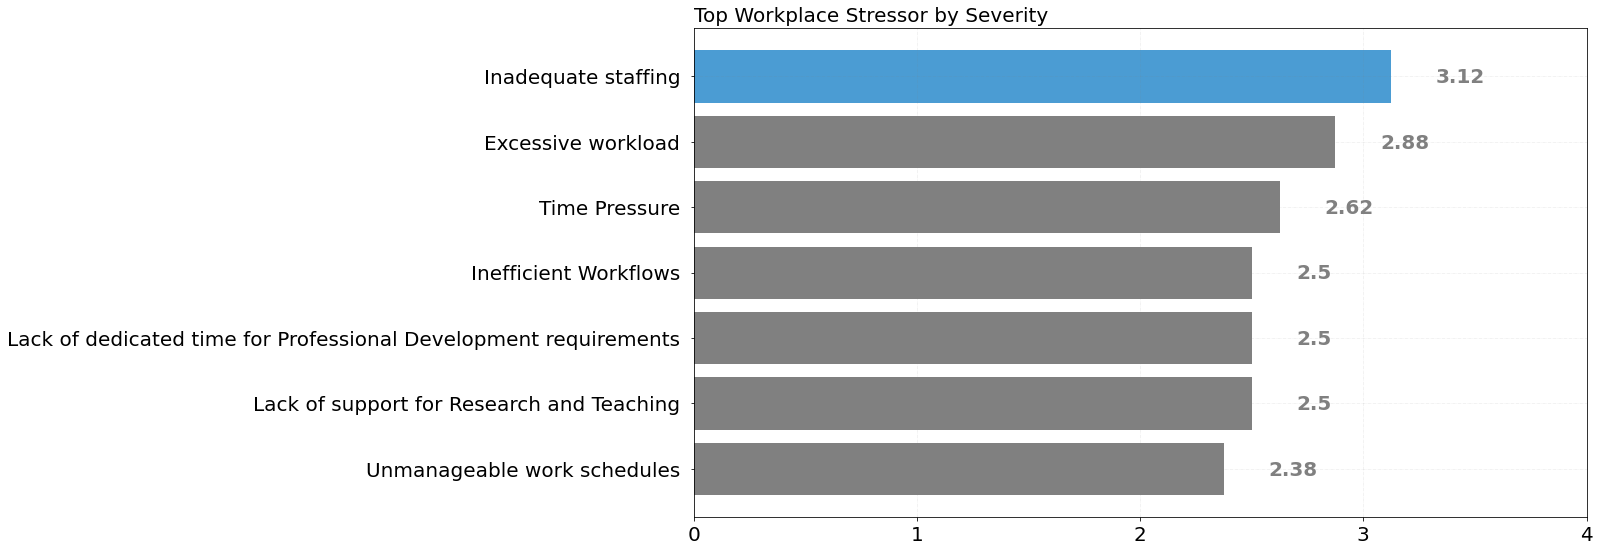

In [108]:
#visualized to bar chart
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

plt.rcParams.update({'font.size':20})


data_normalized = [x / max(workplace_stressors_top_5['mean']) for x in workplace_stressors_top_5['mean']]


my_cmap = plt.cm.get_cmap('YlGnBu')
colors = my_cmap(data_normalized)


fig, ax = plt.subplots(figsize =(16, 9))

Question = workplace_stressors_top_5['question']
Mean = workplace_stressors_top_5['mean']

max_val = workplace_stressors_top_5['mean'].max()

col = []
for val in Mean:
    if val == max_val:
        col.append('#4B9CD3')
    else:
        col.append('gray')

ax.barh(Question, Mean, color = col)

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

plt.xticks(range(0, 5))



# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 20, fontweight ='bold',
             color ='grey')

 
# Add Plot Title
ax.set_title('Top Workplace Stressor by Severity',
             loc ='left',fontsize = 20, )
 
# Add Text watermark
fig.text(0.9, 0.15, '', fontsize = 20,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

 
# Show Plot
plt.show()

## Q20 Analysis

Q20 Analysis, nothing need to be modifiy here, please run the code<br>
What's done here: <br>
1. Create a new dataframe by copying Q20 column
2. Convert all cell's dataType from string to int for analysis
3. Calculate all data's mean, range, sd, and variance and insert into a new table call "priority_for_improvement"
4. Merge table "priority_for_improvement" and "question" from file "Question" to get the tile of each priority for improvement, new table call "priority_for_improvement_analysis"
5. Sort "priority_for_improvement" by mean and find top 7
6. Visualized mean with barchart<br>
<br>

Screenshot the "print_table_Q20" table and include it into the slides <br>
Copy and Paste the barchart into the slides<br>

In [119]:
#Q20 priority for improvement
selected_columns_2 = df_numeric_data_2[['Q20#1_1', 'Q20#1_2', 'Q20#1_3', 'Q20#1_4', 'Q20#1_5', 'Q20#1_6', 'Q20#1_7', 'Q20#1_8', 'Q20#1_9', 'Q20#1_10', 'Q20#1_11', 'Q20#1_12', 'Q20#1_13', 'Q20#1_14', 'Q20#1_15', 'Q20#1_16', 'Q20#1_17', 'Q20#1_18', 'Q20#1_19', 'Q20#1_20', 'Q20#1_21',]]
df_numeric_data_4 = selected_columns_2.copy()
df_numeric_data_4

,Q20#1_1,Q20#1_2,Q20#1_3,Q20#1_4,Q20#1_5,Q20#1_6,Q20#1_7,Q20#1_8,Q20#1_9,Q20#1_10,Q20#1_11,Q20#1_12,Q20#1_13,Q20#1_14,Q20#1_15,Q20#1_16,Q20#1_17,Q20#1_18,Q20#1_19,Q20#1_20,Q20#1_21
0,3,3,2,4,4,NaN,NaN,NaN,NaN,2,2,2,3,2,2,2,3,3,2,2,3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
2,NaN,2,2,NaN,NaN,2,2,2,2,NaN,2,2,2,2,2,2,NaN,NaN,2,2,3
3,3,2,NaN,3,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,3,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,2,2,3,2,2,2,NaN,2,2,3,3
5,4,4,4,4,2,2,2,NaN,NaN,2,3,2,3,2,2,2,2,2,2,3,4
6,3,3,3,3,2,2,2,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3,3,2,4,2,2,2,2,2,2,2,2,3,3,2,2,2,3,2,2,2


In [120]:
#convert dataTpye from string to int
df_numeric_data_4 = df_numeric_data_4.astype('float')
df_numeric_data_4 = df_numeric_data_4.astype('Int64')
df_numeric_data_4

,Q20#1_1,Q20#1_2,Q20#1_3,Q20#1_4,Q20#1_5,Q20#1_6,Q20#1_7,Q20#1_8,Q20#1_9,Q20#1_10,Q20#1_11,Q20#1_12,Q20#1_13,Q20#1_14,Q20#1_15,Q20#1_16,Q20#1_17,Q20#1_18,Q20#1_19,Q20#1_20,Q20#1_21
0,3,3,2,4,4,<NA>,<NA>,<NA>,<NA>,2,2,2,3,2,2,2,3,3,2,2,3
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4,<NA>
2,<NA>,2,2,<NA>,<NA>,2,2,2,2,<NA>,2,2,2,2,2,2,<NA>,<NA>,2,2,3
3,3,2,<NA>,3,<NA>,2,<NA>,<NA>,<NA>,<NA>,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2
4,3,3,3,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2,2,3,2,2,2,<NA>,2,2,3,3
5,4,4,4,4,2,2,2,<NA>,<NA>,2,3,2,3,2,2,2,2,2,2,3,4
6,3,3,3,3,2,2,2,2,2,<NA>,<NA>,<NA>,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,3,3,2,4,2,2,2,2,2,2,2,2,3,3,2,2,2,3,2,2,2


In [121]:
#count mean
Q20_mean = df_numeric_data_4.mean(skipna=True) #.sort_values(ascending=True)
priority_for_improvement = Q20_mean.to_frame(name="mean")
priority_for_improvement

,mean
Q20#1_1,3.166667
Q20#1_2,2.857143
Q20#1_3,2.666667
Q20#1_4,3.500000
Q20#1_5,2.500000
Q20#1_6,2.000000
Q20#1_7,2.000000
Q20#1_8,2.000000
Q20#1_9,2.000000
Q20#1_10,2.000000


In [122]:
#count range
Q20_range = df_numeric_data_4.max(skipna=True) - df_numeric_data_4.min(skipna=True) 
priority_for_improvement['range'] = Q20_range
priority_for_improvement

,mean,range
Q20#1_1,3.166667,1
Q20#1_2,2.857143,2
Q20#1_3,2.666667,2
Q20#1_4,3.500000,1
Q20#1_5,2.500000,2
Q20#1_6,2.000000,0
Q20#1_7,2.000000,0
Q20#1_8,2.000000,0
Q20#1_9,2.000000,0
Q20#1_10,2.000000,0


In [123]:
#count standard_deviation
Q20_std = df_numeric_data_4.std(skipna=True) 
priority_for_improvement['standard_deviation'] = Q20_std
priority_for_improvement

,mean,range,standard_deviation
Q20#1_1,3.166667,1,0.408248
Q20#1_2,2.857143,2,0.690066
Q20#1_3,2.666667,2,0.816497
Q20#1_4,3.500000,1,0.547723
Q20#1_5,2.500000,2,1.000000
Q20#1_6,2.000000,0,0.000000
Q20#1_7,2.000000,0,0.000000
Q20#1_8,2.000000,0,0.000000
Q20#1_9,2.000000,0,0.000000
Q20#1_10,2.000000,0,0.000000


In [124]:
#count variance
Q20_var = df_numeric_data_4.var(skipna=True) 
priority_for_improvement['variance'] = Q20_var
priority_for_improvement

,mean,range,standard_deviation,variance
Q20#1_1,3.166667,1,0.408248,0.166667
Q20#1_2,2.857143,2,0.690066,0.476190
Q20#1_3,2.666667,2,0.816497,0.666667
Q20#1_4,3.500000,1,0.547723,0.300000
Q20#1_5,2.500000,2,1.000000,1.000000
Q20#1_6,2.000000,0,0.000000,0.000000
Q20#1_7,2.000000,0,0.000000,0.000000
Q20#1_8,2.000000,0,0.000000,0.000000
Q20#1_9,2.000000,0,0.000000,0.000000
Q20#1_10,2.000000,0,0.000000,0.000000


In [125]:
#read Q20 priority_for_improvement
Qdf_20_question = pd.read_excel('Question.xlsx', sheet_name='Q20#1')
Qdf_20_question

,question_id,question
0,Q20#1_1,Excessive workload
1,Q20#1_2,Unmanageable work schedules
2,Q20#1_3,Time Pressure
3,Q20#1_4,Inadequate staffing
4,Q20#1_5,Inefficient Workflows
5,Q20#1_6,Interruptions & Distractions
6,Q20#1_7,Inadequate Technology Implementation
7,Q20#1_8,Moral Distress
8,Q20#1_9,Patient Factors
9,Q20#1_10,Lack of recognition for Quality Improvement activities


In [126]:
#join question
priority_for_improvement_analysis = pd.merge(priority_for_improvement, Qdf_20_question,  left_index=True, right_on='question_id')

#reorder columns
priority_for_improvement_analysis = priority_for_improvement_analysis[['question_id', 'question', 'mean', 'range', 'standard_deviation', 'variance']]
priority_for_improvement_analysis

,question_id,question,mean,range,standard_deviation,variance
0,Q20#1_1,Excessive workload,3.166667,1,0.408248,0.166667
1,Q20#1_2,Unmanageable work schedules,2.857143,2,0.690066,0.476190
2,Q20#1_3,Time Pressure,2.666667,2,0.816497,0.666667
3,Q20#1_4,Inadequate staffing,3.500000,1,0.547723,0.300000
4,Q20#1_5,Inefficient Workflows,2.500000,2,1.000000,1.000000
5,Q20#1_6,Interruptions & Distractions,2.000000,0,0.000000,0.000000
6,Q20#1_7,Inadequate Technology Implementation,2.000000,0,0.000000,0.000000
7,Q20#1_8,Moral Distress,2.000000,0,0.000000,0.000000
8,Q20#1_9,Patient Factors,2.000000,0,0.000000,0.000000
9,Q20#1_10,Lack of recognition for Quality Improvement activities,2.000000,0,0.000000,0.000000


In [127]:
#export to excel
#priority_for_improvement_analysis.to_excel('priority_analysis.xlsx', sheet_name='priority_analysis')


In [139]:
#select top 7 improvement priority
improvement_priority_top_5 = priority_for_improvement_analysis.nlargest(5, ['mean'], keep='all')
improvement_priority_top_5.loc[:, workplace_stressors_analysis.columns!='question_id']
#improvement_priority_top_5.to_excel('improvement_priority_top_7.xlsx', sheet_name='workplace_stressors_analysis')
improvement_priority_top_5

,question_id,question,mean,range,standard_deviation,variance
3,Q20#1_4,Inadequate staffing,3.500000,1,0.547723,0.300000
0,Q20#1_1,Excessive workload,3.166667,1,0.408248,0.166667
1,Q20#1_2,Unmanageable work schedules,2.857143,2,0.690066,0.476190
20,Q20#1_21,Work-life Integration,2.833333,2,0.752773,0.566667
2,Q20#1_3,Time Pressure,2.666667,2,0.816497,0.666667
12,Q20#1_13,Lack of support for Research and Teaching,2.666667,1,0.516398,0.266667
19,Q20#1_20,Extrinsic Motivations and Rewards,2.666667,2,0.816497,0.666667


In [147]:

improvement_priority_top_5_rename = improvement_priority_top_7.copy()

improvement_priority_top_5_rename.rename(
    columns={"question":"Workplace Stressor",
                "mean":"Mean",
             "range":"Range",
             "standard_deviation":"Standard Deviation"}
          ,inplace=True)

improvement_priority_top_5_rename.loc[:, improvement_priority_top_5_rename.columns!='question_id']

print_table_Q20 = improvement_priority_top_5_rename.nlargest(5, ['Mean']).loc[:, workplace_stressors_top_5_rename.columns!='question_id']
print_table_Q20.style.hide_index()

Workplace Stressor,Mean,Range,Standard Deviation,variance
Inadequate staffing,3.500000,1,0.547723,0.300000
Excessive workload,3.166667,1,0.408248,0.166667
Unmanageable work schedules,2.857143,2,0.690066,0.476190
Work-life Integration,2.833333,2,0.752773,0.566667
Time Pressure,2.666667,2,0.816497,0.666667


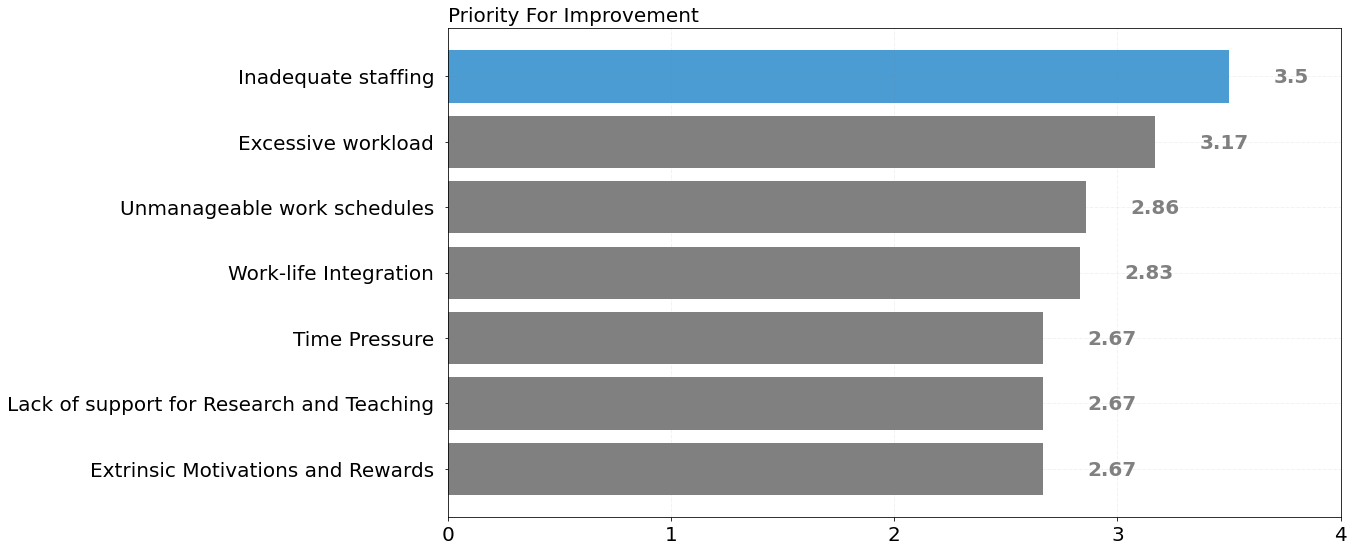

In [141]:
#visualized to bar chart
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

plt.rcParams.update({'font.size':20})


data_normalized = [x / max(improvement_priority_top_5['mean']) for x in improvement_priority_top_5['mean']]


my_cmap = plt.cm.get_cmap('YlGnBu')
colors = my_cmap(data_normalized)


fig, ax = plt.subplots(figsize =(16, 9))

Question = improvement_priority_top_5['question']
Mean = improvement_priority_top_5['mean']

max_val = improvement_priority_top_5['mean'].max()

col = []
for val in Mean:
    if val == max_val:
        col.append('#4B9CD3')
    else:
        col.append('gray')

ax.barh(Question, Mean, color = col)

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

plt.xticks(range(0, 5))


# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 20, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Priority For Improvement',
             loc ='left',fontsize = 20, )
 
# Add Text watermark
fig.text(0.9, 0.15, '', fontsize = 20,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

 
# Show Plot
plt.show()